## Final Project Submission

* Student name: Linh Mai
* Student pace: self paced
* Scheduled project review date/time: May 5th, 2020
* Instructor name: Jeff Herman
* Blog post URL: https://linhmai19.github.io/

# The 1st Question: 
# How does the release date of a movie affect its popularity and profitability?

# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read all the data files

In [2]:
bom_gross = pd.read_csv('data/bom.movie_gross.csv')
imdb_name = pd.read_csv('data/name.basics.csv')
imdb_title = pd.read_csv('data/title.akas.csv')
imdb_basic = pd.read_csv('data/title.basics.csv')
imdb_crew = pd.read_csv('data/title.crew.csv')
imdb_principal = pd.read_csv('data/title.principals.csv')
imdb_rating = pd.read_csv('data/title.ratings.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.csv')
rt_review = pd.read_csv('data/rt.reviews.csv')
tmdb_movie = pd.read_csv('data/tmdb.movies.csv')
tn_budget = pd.read_csv('data/tn.movie_budgets.csv')

# Preview some info in useful datasets

In [3]:
print(imdb_basic.shape)
print(imdb_basic.isna().sum())
imdb_basic.head()

(146144, 6)
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
print(rt_movie_info.shape)
print(rt_movie_info.isna().sum())
rt_movie_info.head()

(1560, 12)
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,13-Sep-96,18-Apr-00,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,9-Dec-94,27-Aug-97,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
print(rt_review.shape)
print(rt_review.isna().sum())
rt_review.head()

(54432, 8)
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
print(tmdb_movie.shape)
print(tmdb_movie.isna().sum())
tmdb_movie.head()

(26517, 10)
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
print(tn_budget.shape)
print(tn_budget.isna().sum())
tn_budget.head()

(5782, 6)
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Release Date v.s. Popularity

In [8]:
#Remove the 'unnamed' column and set 'id' column as index
tmdb_movie = tmdb_movie.drop('Unnamed: 0', 1)
tmdb_movie.set_index('id', inplace=True)
tmdb_movie.head()

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,,,
12444,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
10138,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
862,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
27205,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
#change the type of 'release_date' column from object to datetime 
tmdb_movie['release_date'] = pd.to_datetime(tmdb_movie['release_date'])
print(tmdb_movie['release_date'].dtype)

datetime64[ns]


In [10]:
#Choose only recent movies: from 2000 to 2018
movies_from_2000_2018 = tmdb_movie[(tmdb_movie['release_date'] > '2000-01-01') 
                                      & (tmdb_movie['release_date'] <= '2018-12-31')].copy()
movies_from_2000_2018

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,,,
12444,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
10138,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
27205,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186
32657,"[12, 14, 10751]",en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
...,...,...,...,...,...,...,...,...
488143,"[27, 18]",en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
485975,"[18, 53]",en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
381231,"[14, 28, 12]",en,The Last One,0.600,2018-10-01,The Last One,0.0,1


In [11]:
#check the missing values again in movie_from_2000_2018 dataframe in each column
movies_from_2000_2018.isna().sum()

genre_ids            0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [12]:
#Extract the month and the day of the week from 'release_date' column and make them into 2 new columns
movies_from_2000_2018['month'] = pd.DatetimeIndex(movies_from_2000_2018['release_date']).month
movies_from_2000_2018['day_of_week'] = movies_from_2000_2018['release_date'].dt.day_name()
movies_from_2000_2018.head()

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,month,day_of_week
id,,,,,,,,,,
12444,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,Friday
10191,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,Friday
10138,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,Friday
27205,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,Friday
32657,"[12, 14, 10751]",en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2,Thursday


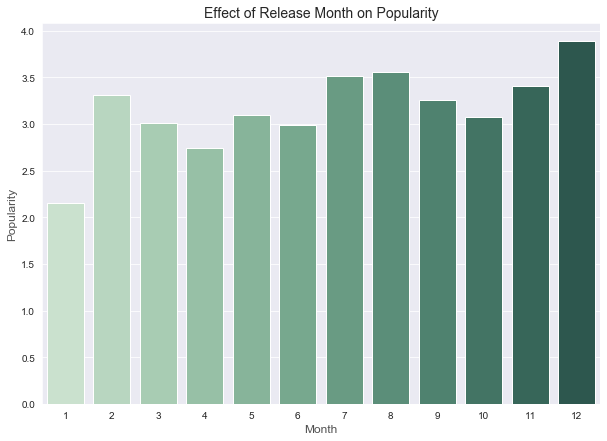

In [13]:
#graph to see the relationship between the release month and its popularity
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')
gr1 = sns.barplot(x='month', y='popularity', data=movies_from_2000_2018,
                  ci=None, palette='ch:2.5,-.2,dark=.3')
gr1.set_xlabel('Month', fontsize=12, alpha=0.8)
gr1.set_ylabel('Popularity', fontsize=12, alpha=0.8)
gr1.set_title('Effect of Release Month on Popularity', fontsize=14)
plt.show()

#### Comment: 
The release months of February, July, August, November and December have higher popularity 

In [14]:
#sort day of the week chronologically 
movies_from_2000_2018['day_of_week'] = pd.Categorical(movies_from_2000_2018['day_of_week'], categories=
                                       ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                       ordered=True)

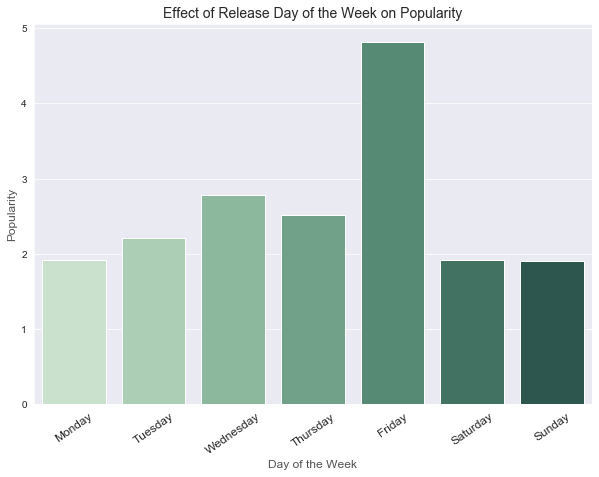

In [15]:
#graph to see the relationship between release day of the week and its poplarity
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')
gr2 = sns.barplot(x='day_of_week', y='popularity', data=movies_from_2000_2018, 
                  ci=None, palette='ch:2.5,-.2,dark=.3')
gr2.set_xlabel('Day of the Week', fontsize=12, alpha=0.8)
gr2.set_ylabel('Popularity', fontsize=12, alpha=0.8)
gr2.set_title('Effect of Release Day of the Week on Popularity', fontsize=14)
gr2.set_xticklabels(gr2.get_xticklabels(),fontsize=12, rotation=35)
plt.show()

#### Comment: 
Friday is the release day of the week that has an outstanding popularity 

# Effect of Release Date on Profit

In [16]:
#set 'id' column as index for tn_budget dataframe
tn_budget.set_index('id', inplace=True)
tn_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
tn_budget['production_budget'].dtype

dtype('O')

In [18]:
tn_budget['worldwide_gross'].dtype

dtype('O')

In [19]:
from numpy import int64

In [20]:
#Remove the '$' sign and comma ',' and change the type to int for production_budget and worldwide_gross columns
tn_budget['production_budget'] = tn_budget['production_budget'].str.replace('$','').str.replace(',','').astype(int64)
tn_budget['worldwide_gross'] = tn_budget['worldwide_gross'].str.replace('$','').str.replace(',','')

In [21]:
#change the type of worldwide_gross separately to confirm the change and preview the change
tn_budget['worldwide_gross'] = tn_budget['worldwide_gross'].astype(int64)

In [22]:
#Calculate the profit from production_budget and worldwide_gross and store it to a new column named 'profit'
tn_budget['profit'] = (tn_budget['worldwide_gross'] - tn_budget['production_budget'])
tn_budget['profit'] = tn_budget['profit'].astype(int64)

In [23]:
tn_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747


In [24]:
#check the type of 'release_date' column
print(tn_budget['release_date'].dtype)

object


In [25]:
#change the type of 'release_date' column from object to datetime 
tn_budget['release_date'] = pd.to_datetime(tn_budget['release_date'])
print(tn_budget['release_date'].dtype)

datetime64[ns]


In [26]:
#Choose only recent movies: from 2000 to 2018
movies_from_2000_2018_b = tn_budget[(tn_budget['release_date'] > '2000-01-01') 
                                      & (tn_budget['release_date'] <= '2018-12-31')].copy()
movies_from_2000_2018_b

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,2009-12-18,Avatar,425000000,"$760,507,625",2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
4,2015-05-01,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,1747311220
...,...,...,...,...,...,...
77,2004-12-31,The Mongol King,7000,$900,900,-6100
78,2018-12-31,Red 11,7000,$0,0,-7000
80,2005-07-13,Return to the Land of Wonders,5000,"$1,338",1338,-3662


In [27]:
#Extract the release month information and its day of the week from the release_date
movies_from_2000_2018_b['month'] = pd.DatetimeIndex(movies_from_2000_2018_b['release_date']).month
movies_from_2000_2018_b['day_of_week'] = movies_from_2000_2018_b['release_date'].dt.day_name()
movies_from_2000_2018_b.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,month,day_of_week
id,,,,,,,,
1,2009-12-18,Avatar,425000000,"$760,507,625",2776345279,2351345279,12,Friday
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875,5,Friday
4,2015-05-01,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963,5,Friday
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747,12,Friday
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,1747311220,12,Friday


In [28]:
#Calculate the mean and the median of profit
print('The mean of profit: ', movies_from_2000_2018_b['profit'].mean())
print('The median of profit: ', movies_from_2000_2018_b['profit'].median())

The mean of profit:  62773367.40560575
The median of profit:  7781305.0


#### Comment:
The mean is much greater than the median, so it means that there are a lot of outliers and it is a positively skewed distribution

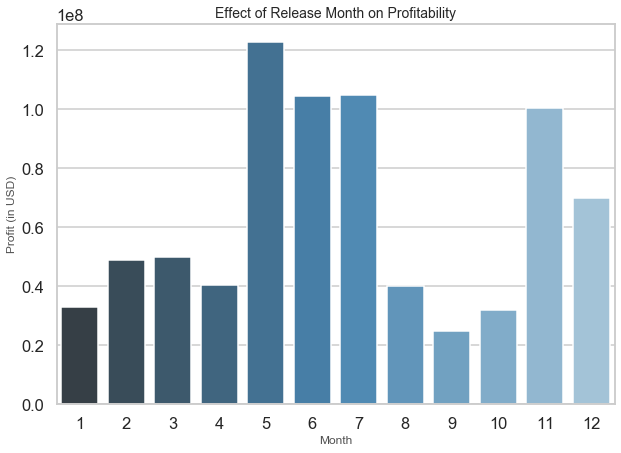

In [29]:
#graph to see the relationship between the release month and its profitability 
mp = plt.figure(figsize=(10, 7))
sns.set(style='whitegrid', context='talk')
mp = sns.barplot(x='month', y='profit', data=movies_from_2000_2018_b, 
                 ci=None, palette='Blues_d')
mp.set_xlabel('Month', fontsize=12, alpha=0.8)
mp.set_ylabel('Profit (in USD)', fontsize=12, alpha=0.8)
mp.set_title('Effect of Release Month on Profitability', fontsize=14)
plt.show()

#### Comment: 
The months that have higher profit are May, June, July (Summer season) and November, December (Holidays season)

In [30]:
#sort day of the week chronologically 
movies_from_2000_2018_b['day_of_week'] = pd.Categorical(movies_from_2000_2018_b['day_of_week'], categories=
                                       ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                       ordered=True)

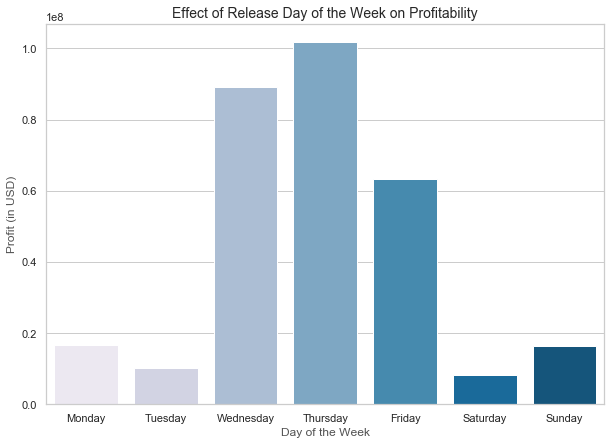

In [31]:
#graph to see the relationship between release day of the week and its profitability 
dp = plt.figure(figsize=(10, 7))
sns.set(style='whitegrid')
dp = sns.barplot(x='day_of_week', y='profit', data=movies_from_2000_2018_b, 
                 ci=None, palette='PuBu')
dp.set_xlabel('Day of the Week', fontsize=12, alpha=0.8)
dp.set_ylabel('Profit (in USD)', fontsize=12, alpha=0.8)
dp.set_title('Effect of Release Day of the Week on Profitability', fontsize=14)
plt.show()

#### Comment: 
Wednesday, Thursday and Friday are the release days of the week that have higher profit

# FINAL RESULTS

## Release Month v.s. Popularity and Profitability 

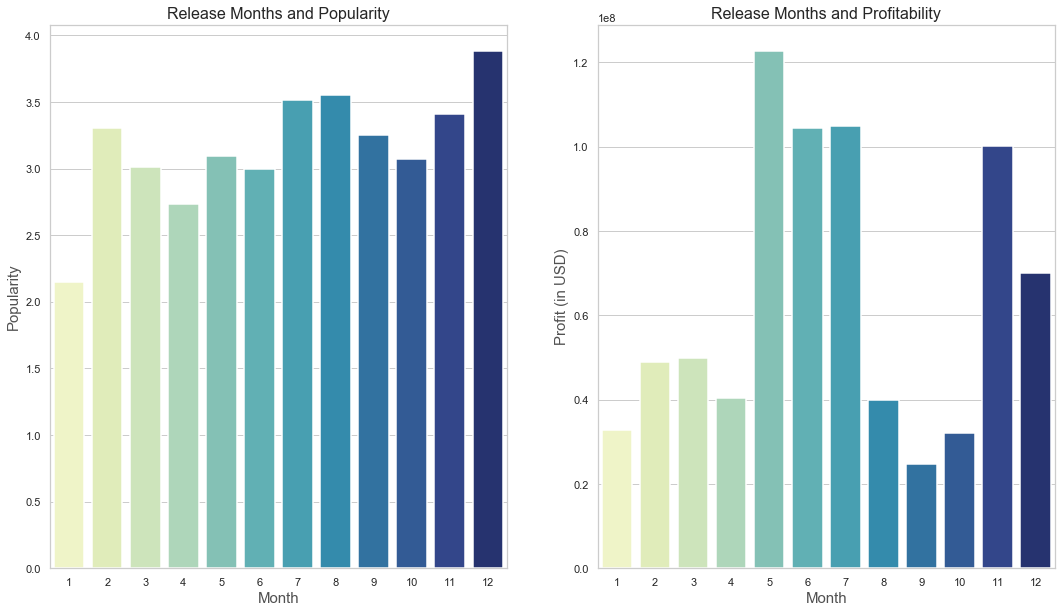

In [32]:
month_pop_pro = plt.figure(figsize=(18, 10))
m_pop = month_pop_pro.add_subplot(121)
m_pro = month_pop_pro.add_subplot(122)
sns.set(style='darkgrid', context='talk')

sns.barplot(x='month', y='popularity', data=movies_from_2000_2018, ax=m_pop, 
            ci=None, palette='YlGnBu')
sns.barplot(x='month', y='profit', data=movies_from_2000_2018_b, ax=m_pro, 
            ci=None, palette='YlGnBu')

m_pop.set_title('Release Months and Popularity', fontsize=16)
m_pop.set_xlabel('Month', fontsize=15, alpha=0.8)
m_pop.set_ylabel('Popularity', fontsize=15, alpha=0.8)

m_pro.set_title('Release Months and Profitability', fontsize=16)
m_pro.set_xlabel('Month', fontsize=15, alpha=0.8)
m_pro.set_ylabel('Profit (in USD)', fontsize=15, alpha=0.8)

plt.show()

## Release day of the week v.s. Popularity and Profitability 

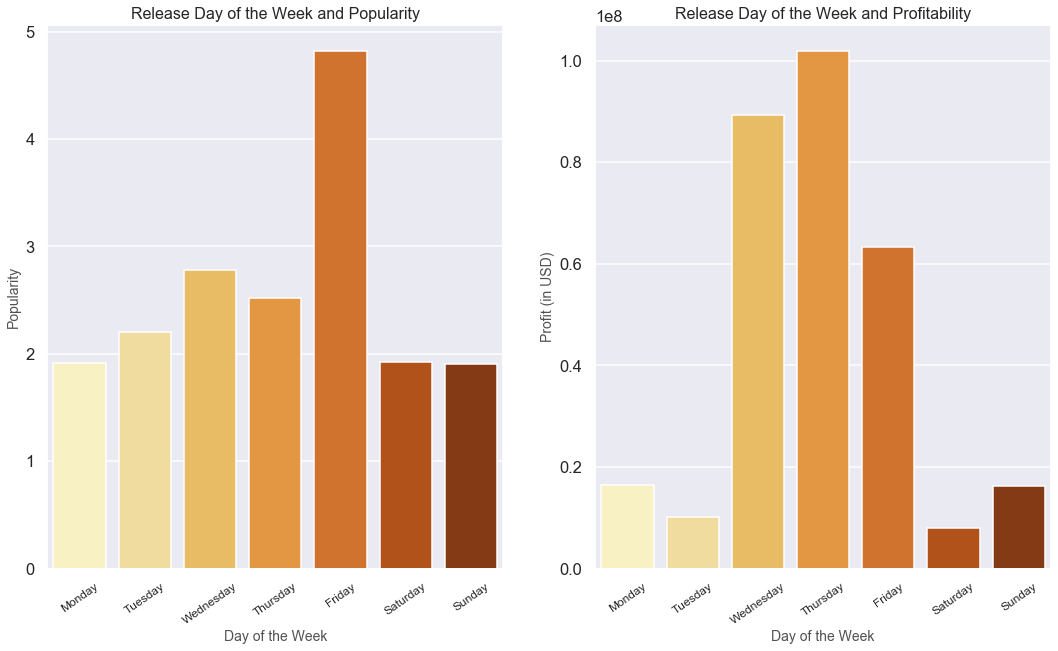

In [33]:
day_pop_pro = plt.figure(figsize=(18, 10))
d_pop = day_pop_pro.add_subplot(121)
d_pro = day_pop_pro.add_subplot(122)
sns.set(style='darkgrid', context='talk')

sns.barplot(x='day_of_week', y='popularity', data=movies_from_2000_2018, ax=d_pop, 
            ci=None, palette='YlOrBr')
sns.barplot(x='day_of_week', y='profit', data=movies_from_2000_2018_b, ax=d_pro, 
            ci=None, palette='YlOrBr')

d_pop.set_title('Release Day of the Week and Popularity', fontsize=16)
d_pop.set_xlabel('Day of the Week', fontsize=14, alpha=0.8)
d_pop.set_ylabel('Popularity', fontsize=14, alpha=0.8)
d_pop.set_xticklabels(d_pop.get_xticklabels(),fontsize=12, rotation=35)

d_pro.set_title('Release Day of the Week and Profitability', fontsize=16)
d_pro.set_xlabel('Day of the Week', fontsize=14, alpha=0.8)
d_pro.set_ylabel('Profit (in USD)', fontsize=14, alpha=0.8)
d_pro.set_xticklabels(d_pro.get_xticklabels(),fontsize=12, rotation=35)

plt.show()